# Exploring the Neighborhoods in Alaska: Restaurants according to Classes of region

This is the final project of IBM Specialization courses (9) by Coursera. Firstly I want to make research about my own city - Baku in Azerbaijan, but unfortunately the latitudes and the longitudes of our region don't exist in anywhere. Gathering information about it can take a long time than you think. That is why I decided to find better place for my research and decided in Alaska (USA). So this is my Capstone project.

### **Table of Contents**

#### **1. Discussion and Background of the Business Problem**
#### **2. Data Preparation**
#### **3. Explore regions in Singapore**
#### **4. Analyze Each Neighborhood**
#### **5. Cluster Neighborhoods**
#### **6. Examine Clusters**
#### **7. Results and Discussion**
#### **8. Conclusion**

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
!pip install beautifulsoup4

!python3 -m pip install lxml

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.10

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.10

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Libraries imported.


## **1. Discussion and Background of the Business Problem**

You won’t be surprised to hear that Alaska’s specialty is fresh fish. Salmon, halibut, and crab—plucked right from some of the world’s most pristine waters—may well be one of the main reasons you visit Alaska.

But here’s the rub: it’s hard to find a restaurant that serves memorable meals. And it’s expensive: even a basic dinner entrée can run you up to $30.

Imagine that we want to open new restaurant in Alaska. But we should find better borough for it. We should find it in **Unified Home-Rule** classed place due to the some reasons. (A “unified municipality” is an organized borough (unified, home-rule borough). A unified municipality is defined as such by the Local Boundary Commission in 3 AAC 110.990(1). The Alaska Constitution recognizes only two types of municipalities, cities and boroughs. The legislature consistently treats unified municipalities as boroughs. For example, State statutes utilize the same standards for incorporation of a borough as they do for incorporation of a unified municipality . By contrast, the legislature has established separate standards for incorporation of a city.)

## **2. Data Preparation:**

### **2.1. Get The Names of Areas, Regions and Squares from Wikipedia**

In [2]:
from bs4 import BeautifulSoup
response_obj = requests.get('https://en.wikipedia.org/wiki/List_of_boroughs_and_census_areas_in_Alaska').text
print(type(response_obj))

<class 'str'>


In [3]:
soup = BeautifulSoup(response_obj,'html.parser')
#print (soup.prettify())

### **Processing the Information From Wiki To Make Necessary Lists**

In [4]:
#pinpointing the location of the table and its contents
Alaska_Table = soup.find('table', class_ = 'wikitable sortable')
#Districts_Alaska_Table

In [5]:
Name = []
Region = []
Area = []

for row in Alaska_Table.findAll("tr"):
    #print (row)    
    Ward = row.findAll('td')
    #print (len(Ward))
   
    if len(Ward)==10: #Only extract table body not heading
        Name.append(Ward[0].find(text=True).rstrip())
        Region.append(Ward[2].find(text=True).rstrip())
        Area.append(Ward[8].find(text=True).rstrip())

In [6]:
Alaska_data=pd.DataFrame(Name,columns=['Name'])
Alaska_data['Region']=Region
Alaska_data['Area_SqKm']=Area
Alaska_data

,Name,Region,Area_SqKm
0,013,Second,"6,988"
1,020,Unified Home Rule,"1,697"
2,060,Second,505
3,068,Home Rule,"12,750"
4,090,Second,"7,366"
5,100,Home Rule,"2,344"
6,110,Unified Home Rule,"2,716"
7,122,Second,"16,013"
8,130,Second,"4,840"
9,150,Second,"6,560"


In [7]:
Alaska_data['Name']='Aleutians East Borough','Anchorage','Bristol Bay Borough','Denali Borough','Fairbanks North Star Borough','Haines Borough','Juneau','Kenai Peninsula Borough','Ketchikan Gateway Borough','Kodiak Island Borough','Lake and Peninsula Borough','Matanuska-Susitna Borough','North Slope Borough','Northwest Arctic Borough','Petersburg Borough','Sitka','Skagway','Unorganized Borough','Wrangell','Yakutat'
Alaska_data

,Name,Region,Area_SqKm
0,Aleutians East Borough,Second,"6,988"
1,Anchorage,Unified Home Rule,"1,697"
2,Bristol Bay Borough,Second,505
3,Denali Borough,Home Rule,"12,750"
4,Fairbanks North Star Borough,Second,"7,366"
5,Haines Borough,Home Rule,"2,344"
6,Juneau,Unified Home Rule,"2,716"
7,Kenai Peninsula Borough,Second,"16,013"
8,Ketchikan Gateway Borough,Second,"4,840"
9,Kodiak Island Borough,Second,"6,560"


### **Get the Coordinates of the Areas**

In [8]:
from geopy.geocoders import Nominatim
geolocator = Nominatim()
Alaska_data['Area_Name_Coord']= Alaska_data['Name'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  


In [9]:
Alaska_data[['Latitude', 'Longitude']] = Alaska_data['Area_Name_Coord'].apply(pd.Series)

In [10]:
Alaska_data.drop(['Area_Name_Coord'], axis=1, inplace=True)
Alaska_data

,Name,Region,Area_SqKm,Latitude,Longitude
0,Aleutians East Borough,Second,"6,988",55.051244,-162.891689
1,Anchorage,Unified Home Rule,"1,697",61.216313,-149.894852
2,Bristol Bay Borough,Second,505,58.737034,-156.875387
3,Denali Borough,Home Rule,"12,750",63.878678,-149.650166
4,Fairbanks North Star Borough,Second,"7,366",64.864904,-146.775162
5,Haines Borough,Home Rule,"2,344",59.083123,-135.343057
6,Juneau,Unified Home Rule,"2,716",58.301950,-134.419734
7,Kenai Peninsula Borough,Second,"16,013",60.096827,-151.788033
8,Ketchikan Gateway Borough,Second,"4,840",55.489748,-131.011963
9,Kodiak Island Borough,Second,"6,560",57.543377,-153.357412


### **Final Data-Frame with Coordinates of the Major Areas**

In [11]:
Alaska_data

,Name,Region,Area_SqKm,Latitude,Longitude
0,Aleutians East Borough,Second,"6,988",55.051244,-162.891689
1,Anchorage,Unified Home Rule,"1,697",61.216313,-149.894852
2,Bristol Bay Borough,Second,505,58.737034,-156.875387
3,Denali Borough,Home Rule,"12,750",63.878678,-149.650166
4,Fairbanks North Star Borough,Second,"7,366",64.864904,-146.775162
5,Haines Borough,Home Rule,"2,344",59.083123,-135.343057
6,Juneau,Unified Home Rule,"2,716",58.301950,-134.419734
7,Kenai Peninsula Borough,Second,"16,013",60.096827,-151.788033
8,Ketchikan Gateway Borough,Second,"4,840",55.489748,-131.011963
9,Kodiak Island Borough,Second,"6,560",57.543377,-153.357412


##### **Use geopy library to get the latitude and longitude values of Singapore.**

In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent ny_explorer, as shown below.

In [12]:
address = 'Alaska'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Alaska areas are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Alaska areas are 64.4459613, -149.680909.


##### **Create a map of Singapore with neighborhoods superimposed on top.**

In [13]:
# create map of Toronto using latitude and longitude values
map_alaska= folium.Map(location=[latitude, longitude], zoom_start=3)

# add markers to map
for lat, lng , Name , Region in zip(Alaska_data['Latitude'], Alaska_data['Longitude'], Alaska_data['Name'], Alaska_data['Region']):
    label = '{}, {}'.format(Region, Name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_alaska)  
    
map_alaska

## **3. Explore regions in Alaska**

In [14]:
CLIENT_ID = 'BURPSDHBL0XRO133LCY4VBS5QUUGYFT13GKQXWYNEGIBQVLA' # your Foursquare ID
CLIENT_SECRET = 'TLE5JH52YACWQORB2GDVM22OIYZTTUHI0GX003C2WJYXGGQL' # your Foursquare Secret
VERSION = '20190729' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: BURPSDHBL0XRO133LCY4VBS5QUUGYFT13GKQXWYNEGIBQVLA
CLIENT_SECRET:TLE5JH52YACWQORB2GDVM22OIYZTTUHI0GX003C2WJYXGGQL


##### **Let's create a function to get the venues to all the regions in Alaska**

Exploring the regions

1.Create the get request url (Foursquare ID and Secret are necessary) 1.a. Number of Venues we will look for is 100 2.a. Radius of Search Would be 100 m.

2.Create a json from the request object (Need requests Module)

3.Create the lists Containing all the information

4.From the lists create the dataframe.

In [15]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    LIMIT = 100 # limit of number of venues returned by Foursquare API

    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood_Latitude', 
                  'Neighborhood_Longitude', 
                  'Venue', 
                  'Venue_Latitude', 
                  'Venue_Longitude', 
                  'Venue_Category']
    
    return(nearby_venues)

### **Use the Function Above to Create the Dataframe of Venues Around areas of Alaska**

In [16]:
alaska_Venues = getNearbyVenues(names=Alaska_data['Name'],
                                   latitudes=Alaska_data['Latitude'],
                                   longitudes=Alaska_data['Longitude']
                                  )

Aleutians East Borough
Anchorage
Bristol Bay Borough
Denali Borough
Fairbanks North Star Borough
Haines Borough
Juneau
Kenai Peninsula Borough
Ketchikan Gateway Borough
Kodiak Island Borough
Lake and Peninsula Borough
Matanuska-Susitna Borough
North Slope Borough
Northwest Arctic Borough
Petersburg Borough
Sitka
Skagway
Unorganized Borough
Wrangell
Yakutat


##### Let's check the size of the resulting dataframe

In [17]:
print(alaska_Venues.shape)
alaska_Venues.head()

(147, 7)


,Neighborhood,Neighborhood_Latitude,Neighborhood_Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category
0,Anchorage,61.216313,-149.894852,Glacier BrewHouse,61.217719,-149.896839,Brewery
1,Anchorage,61.216313,-149.894852,Humpy's Great Alaskan Alehouse,61.216427,-149.894146,Bar
2,Anchorage,61.216313,-149.894852,Alaska Center for the Performing Arts,61.216989,-149.893718,Performing Arts Venue
3,Anchorage,61.216313,-149.894852,Wild Scoops,61.217839,-149.891494,Ice Cream Shop
4,Anchorage,61.216313,-149.894852,Orso,61.217657,-149.895940,Seafood Restaurant


In [18]:
# Create a Data-Frame out of it to Concentrate Only on Restaurants 

Alaska_Venues_only_restaurant = alaska_Venues[alaska_Venues['Venue_Category']\
                                                          .str.contains('Restaurant')].reset_index(drop=True)
Alaska_Venues_only_restaurant.index = np.arange(1, len(Alaska_Venues_only_restaurant)+1)
print ("Shape of the Data-Frame with Venue Category only Restaurant: ", Alaska_Venues_only_restaurant.shape)
Alaska_Venues_only_restaurant.head()

alaska_restuarant = Alaska_data

# merge alaska_grouped with singapore to add latitude/longitude for each neighborhood
alaska_restuarant = alaska_restuarant.join(Alaska_Venues_only_restaurant.set_index('Neighborhood'), on='Name')

alaska_restuarant.head()

Shape of the Data-Frame with Venue Category only Restaurant:  (27, 7)


,Name,Region,Area_SqKm,Latitude,Longitude,Neighborhood_Latitude,Neighborhood_Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category
0,Aleutians East Borough,Second,"6,988",55.051244,-162.891689,NaN,NaN,NaN,NaN,NaN,NaN
1,Anchorage,Unified Home Rule,"1,697",61.216313,-149.894852,61.216313,-149.894852,Orso,61.217657,-149.895940,Seafood Restaurant
1,Anchorage,Unified Home Rule,"1,697",61.216313,-149.894852,61.216313,-149.894852,Ginger,61.217682,-149.890564,Asian Restaurant
1,Anchorage,Unified Home Rule,"1,697",61.216313,-149.894852,61.216313,-149.894852,Crow's Nest,61.217838,-149.899718,Seafood Restaurant
1,Anchorage,Unified Home Rule,"1,697",61.216313,-149.894852,61.216313,-149.894852,Bubbly Mermaid Oyster Bar,61.218149,-149.889501,Seafood Restaurant


### **3.1 Central Alaska Area**

In [19]:
Central_Alaska_restuarent = alaska_restuarant[alaska_restuarant['Region'] == 'Unified Home Rule'].reset_index(drop=True)
Central_Alaska_restuarent.head()

,Name,Region,Area_SqKm,Latitude,Longitude,Neighborhood_Latitude,Neighborhood_Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category
0,Anchorage,Unified Home Rule,"1,697",61.216313,-149.894852,61.216313,-149.894852,Orso,61.217657,-149.895940,Seafood Restaurant
1,Anchorage,Unified Home Rule,"1,697",61.216313,-149.894852,61.216313,-149.894852,Ginger,61.217682,-149.890564,Asian Restaurant
2,Anchorage,Unified Home Rule,"1,697",61.216313,-149.894852,61.216313,-149.894852,Crow's Nest,61.217838,-149.899718,Seafood Restaurant
3,Anchorage,Unified Home Rule,"1,697",61.216313,-149.894852,61.216313,-149.894852,Bubbly Mermaid Oyster Bar,61.218149,-149.889501,Seafood Restaurant
4,Anchorage,Unified Home Rule,"1,697",61.216313,-149.894852,61.216313,-149.894852,Pangaea Restaurant and Lounge,61.216479,-149.891934,Restaurant


Let's check how many venues were returned for each neighborhood

In [20]:
### Number of Unique Categories in the Dataframe 
print('There are {} unique categories.'.format(len(Central_Alaska_restuarent['Venue_Category'].unique())))

There are 12 unique categories.


We have seen that there are 12 unique categories in the Central Alaska Venues Data-Frame. Let's see the Frequency of Each Category

In [21]:
print (Central_Alaska_restuarent['Venue_Category'].value_counts())

Seafood Restaurant           7
American Restaurant          4
Restaurant                   3
Sushi Restaurant             3
Asian Restaurant             2
Mexican Restaurant           2
Thai Restaurant              2
Cajun / Creole Restaurant    1
Japanese Restaurant          1
Mediterranean Restaurant     1
Theme Restaurant             1
Name: Venue_Category, dtype: int64


Create a Data-frame with the 10 Most Frequently Occuring Venue_Category

In [22]:
# create a dataframe of top 10 categories
alaska_Central_Venues_Top10 = Central_Alaska_restuarent['Venue_Category'].value_counts()[0:10].to_frame(name='frequency')
alaska_Central_Venues_Top10=alaska_Central_Venues_Top10.reset_index()
#Singapore_Venues_Top10

alaska_Central_Venues_Top10.rename(index=str, columns={"index": "Venue_Category", "frequency": "Frequency"}, inplace=True)
alaska_Central_Venues_Top10

,Venue_Category,Frequency
0,Seafood Restaurant,7
1,American Restaurant,4
2,Restaurant,3
3,Sushi Restaurant,3
4,Asian Restaurant,2
5,Mexican Restaurant,2
6,Thai Restaurant,2
7,Cajun / Creole Restaurant,1
8,Japanese Restaurant,1
9,Mediterranean Restaurant,1


In [23]:
import seaborn as sns
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(18,7))
s=sns.barplot(x="Venue_Category", y="Frequency", data=alaska_Central_Venues_Top10)
s.set_xticklabels(s.get_xticklabels(), rotation=30)
plt.title('10 Most Frequently Occuring Venues in Central Alaska', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues.png", dpi=300)
plt.show()

<Figure size 1800x700 with 1 Axes>

### Seafood ,American, Ordinary, Sushi and Asian Restaurant is the frequent venues in Unified Home Rule classed areas of Alaska

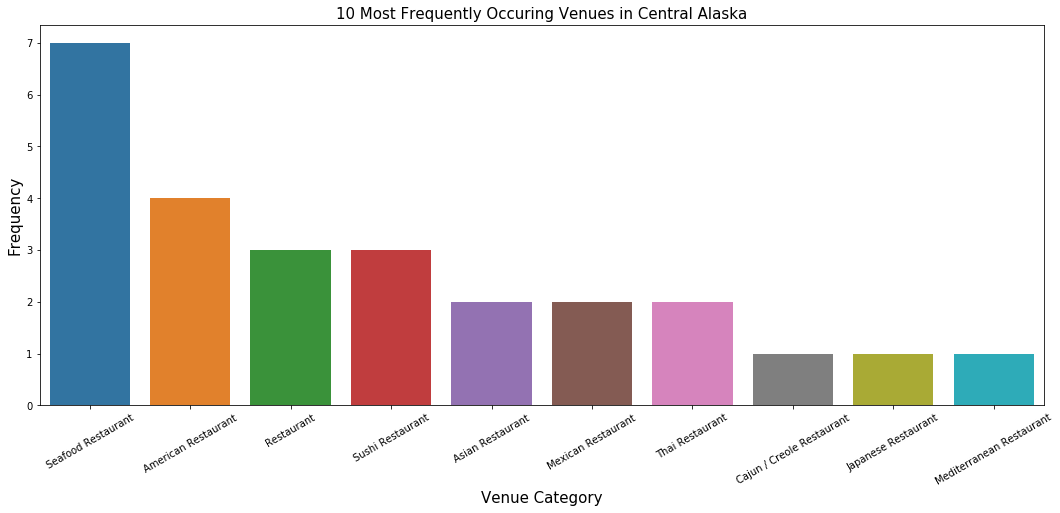

In [24]:
# create a dataframe of top 10 categories
alaska_Central_Venues_Top10 = Central_Alaska_restuarent['Venue_Category'].value_counts()[0:10].to_frame(name='frequency')
alaska_Central_Venues_Top10=alaska_Central_Venues_Top10.reset_index()
#Alaska_Venues_Top10

alaska_Central_Venues_Top10.rename(index=str, columns={"index": "Venue_Category", "frequency": "Frequency"}, inplace=True)
#alaska_Central_Venues_Top10

import seaborn as sns
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(18,7))
s=sns.barplot(x="Venue_Category", y="Frequency", data=alaska_Central_Venues_Top10)
s.set_xticklabels(s.get_xticklabels(), rotation=30)
plt.title('10 Most Frequently Occuring Venues in Central Alaska', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues.png", dpi=300)
plt.show()

## **4. Analyze Each Neighborhood**

In [25]:
# one hot encoding
alaska_onehot = pd.get_dummies(Alaska_Venues_only_restaurant[['Venue_Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
alaska_onehot['Neighborhood'] = Alaska_Venues_only_restaurant['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [alaska_onehot.columns[-1]] + list(alaska_onehot.columns[:-1])
alaska_onehot = alaska_onehot[fixed_columns]

alaska_onehot.head()

,Neighborhood,American Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Japanese Restaurant,Mediterranean Restaurant,Mexican Restaurant,Restaurant,Seafood Restaurant,Sushi Restaurant,Thai Restaurant,Theme Restaurant
1,Anchorage,0,0,0,0,0,0,0,1,0,0,0
2,Anchorage,0,1,0,0,0,0,0,0,0,0,0
3,Anchorage,0,0,0,0,0,0,0,1,0,0,0
4,Anchorage,0,0,0,0,0,0,0,1,0,0,0
5,Anchorage,0,0,0,0,0,0,1,0,0,0,0


In [26]:
alaska_onehot.shape

(27, 12)

##### **Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category**

In [27]:
alaska_grouped = alaska_onehot.groupby('Neighborhood').mean().reset_index()
alaska_grouped

,Neighborhood,American Restaurant,Asian Restaurant,Cajun / Creole Restaurant,Japanese Restaurant,Mediterranean Restaurant,Mexican Restaurant,Restaurant,Seafood Restaurant,Sushi Restaurant,Thai Restaurant,Theme Restaurant
0,Anchorage,0.125000,0.062500,0.0625,0.000000,0.000000,0.062500,0.125000,0.250000,0.125,0.125,0.0625
1,Juneau,0.500000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500,0.000,0.0000
2,Sitka,0.111111,0.111111,0.0000,0.111111,0.111111,0.111111,0.111111,0.333333,0.000,0.000,0.0000


##### **Let's confirm the new size**

In [28]:
alaska_grouped.shape

(3, 12)

##### **Let's print each neighborhood along with 3 common venues**

In [31]:
num_top_venues = 3
for hood in alaska_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = alaska_grouped[alaska_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Anchorage----
                 venue  freq
0   Seafood Restaurant  0.25
1  American Restaurant  0.12
2           Restaurant  0.12


----Juneau----
                 venue  freq
0  American Restaurant   0.5
1     Sushi Restaurant   0.5
2     Asian Restaurant   0.0


----Sitka----
                 venue  freq
0   Seafood Restaurant  0.33
1  American Restaurant  0.11
2     Asian Restaurant  0.11




##### **Let's put that into a pandas dataframe**

##### First, let's write a function to sort the venues in descending order.

In [32]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

##### Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [33]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = alaska_grouped['Neighborhood']

for ind in np.arange(alaska_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(alaska_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Anchorage,Seafood Restaurant,Thai Restaurant,Sushi Restaurant,Restaurant,American Restaurant,Theme Restaurant,Mexican Restaurant,Cajun / Creole Restaurant,Asian Restaurant,Mediterranean Restaurant
1,Juneau,Sushi Restaurant,American Restaurant,Theme Restaurant,Thai Restaurant,Seafood Restaurant,Restaurant,Mexican Restaurant,Mediterranean Restaurant,Japanese Restaurant,Cajun / Creole Restaurant
2,Sitka,Seafood Restaurant,Restaurant,Mexican Restaurant,Mediterranean Restaurant,Japanese Restaurant,Asian Restaurant,American Restaurant,Theme Restaurant,Thai Restaurant,Sushi Restaurant


In [34]:
#neighborhoods_venues_sorted

## **5. Cluster Neighborhoods**

##### Run k-means to cluster the neighborhood into 5 clusters.

In [35]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 3

alaska_grouped_clustering = alaska_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(alaska_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 1, 2], dtype=int32)

##### Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [36]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'ClusterLabels', kmeans.labels_)

alaska_merged = Alaska_data

# merge alaska_grouped with singapore to add latitude/longitude for each neighborhood
alaska_merged = alaska_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Name')

alaska_merged.head() # check the last columns!

,Name,Region,Area_SqKm,Latitude,Longitude,ClusterLabels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Aleutians East Borough,Second,"6,988",55.051244,-162.891689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Anchorage,Unified Home Rule,"1,697",61.216313,-149.894852,0.0,Seafood Restaurant,Thai Restaurant,Sushi Restaurant,Restaurant,American Restaurant,Theme Restaurant,Mexican Restaurant,Cajun / Creole Restaurant,Asian Restaurant,Mediterranean Restaurant
2,Bristol Bay Borough,Second,505,58.737034,-156.875387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Denali Borough,Home Rule,"12,750",63.878678,-149.650166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fairbanks North Star Borough,Second,"7,366",64.864904,-146.775162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
alaska_merged['ClusterLabels'].fillna(0, inplace=True)
alaska_merged['ClusterLabels'] = alaska_merged['ClusterLabels'].apply(np.int64)
alaska_merged['ClusterLabels']

0     0
1     0
2     0
3     0
4     0
5     0
6     1
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    2
16    0
17    0
18    0
19    0
Name: ClusterLabels, dtype: int64

##### Finally, let's visualize the resulting clusters

In [38]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors


# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=4)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(alaska_merged['Latitude'], alaska_merged['Longitude'], alaska_merged['Name'], alaska_merged['ClusterLabels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## **6. Examine Clusters**

##### **Cluster 1**

In [39]:
alaska_cluster1=alaska_merged.loc[alaska_merged['ClusterLabels'] == 0, alaska_merged.columns[[0] + list(range(1, alaska_merged.shape[1]))]]
print ("No of Neighbourhood in Cluster Label 0: %d" %(alaska_cluster1.shape[0]))
alaska_cluster1

No of Neighbourhood in Cluster Label 0: 18


,Name,Region,Area_SqKm,Latitude,Longitude,ClusterLabels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Aleutians East Borough,Second,"6,988",55.051244,-162.891689,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Anchorage,Unified Home Rule,"1,697",61.216313,-149.894852,0,Seafood Restaurant,Thai Restaurant,Sushi Restaurant,Restaurant,American Restaurant,Theme Restaurant,Mexican Restaurant,Cajun / Creole Restaurant,Asian Restaurant,Mediterranean Restaurant
2,Bristol Bay Borough,Second,505,58.737034,-156.875387,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Denali Borough,Home Rule,"12,750",63.878678,-149.650166,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fairbanks North Star Borough,Second,"7,366",64.864904,-146.775162,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Haines Borough,Home Rule,"2,344",59.083123,-135.343057,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Kenai Peninsula Borough,Second,"16,013",60.096827,-151.788033,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Ketchikan Gateway Borough,Second,"4,840",55.489748,-131.011963,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Kodiak Island Borough,Second,"6,560",57.543377,-153.357412,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,Lake and Peninsula Borough,Home Rule,"23,782",58.327711,-156.154765,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### **Cluster 2**

alaska_cluster2=alaska_merged.loc[alaska_merged['ClusterLabels'] == 1, alaska_merged.columns[[0] + list(range(1, alaska_merged.shape[1]))]]
print ("No of Neighbourhood in Cluster Label 1: %d" %(alaska_cluster2.shape[0]))
alaska_cluster2

In [41]:
alaska_cluster3=alaska_merged.loc[alaska_merged['ClusterLabels'] == 2, alaska_merged.columns[[0] + list(range(1, alaska_merged.shape[1]))]]
print ("No of Neighbourhood in Cluster Label 2: %d" %(alaska_cluster3.shape[0]))
alaska_cluster3

No of Neighbourhood in Cluster Label 2: 1


,Name,Region,Area_SqKm,Latitude,Longitude,ClusterLabels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
15,Sitka,Unified Home Rule,"2,874",57.052497,-135.337612,2,Seafood Restaurant,Restaurant,Mexican Restaurant,Mediterranean Restaurant,Japanese Restaurant,Asian Restaurant,American Restaurant,Theme Restaurant,Thai Restaurant,Sushi Restaurant


## **Discussion**

##### The first important observation noticed while creating this report is that the Foursquare data returned is not the same each time an API call is made and hence, the results are not reproducible unless one does save this data to a file for future use. Because of this, a high limit for each call needs to be used in order to maximize the number fo results. Morover, the radius used during the search had an important impact on the number of results because some central of neighborhoods are too dense compared to others. When it comes to performing k-means on the grouped data, special attention mus be placed when choosing the number of clusters as well as the top number of venues to be used. For instance, all previous values tried (<9) resulted in contradictory results. Also, the number of top venues (10) had an impact on the resultst, but not as important the number of clusters so we sticked to 10.

## **Conclusion**

##### We have used the city's data set to obtain each neighborhood's location in the form of a GEOJSON file from which we extracted each neighborhoods polygon's centroid. Using this location information and Foursquare data we obtained 3 clusters using the top 10 venues for each individual neighborhood. Finally, this information allowed us to recommend three areas of the city to customers interested in cheap restaurant, these areas were chosen because of their proximity to the city and their respective clusters, however one must notice that cluster 3 includes both near and far neighborhoods.